## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing Datasets

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [3]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

## Training SVR Model

In [6]:
from sklearn.svm import SVR
y = y.reshape(1,10)[0]
regressor = SVR(kernel='rbf')
regressor.fit(x, y)

SVR()

## Predicting a new result

In [7]:
pred = regressor.predict(sc_x.transform([[6.5]]))
print(pred)

[-0.27861589]


In [8]:
pred = sc_y.inverse_transform(pred)
print(pred)

[170370.0204065]


## Visualizing Results

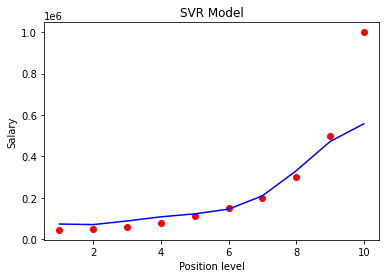

In [15]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y), c='red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x)), c='blue')
plt.title('SVR Model')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()